Import the libraries and load the data

In [104]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from matplotlib.pyplot import figure


In [105]:
# load the csv file
calendar = pd.read_csv('./calendar.csv')
original_listing = pd.read_csv('./listings.csv')
listing=original_listing.copy()
reviews = pd.read_csv('./reviews.csv')

Exploring the data

In [106]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [107]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [108]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [109]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [110]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [111]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Data cleaning:
Main Problems:
- prices are "object" pandas type (str or mixed) -> we want float
- dates are "object" pandas type (str or mixed) -> we want Date
- zipcode are "object" pandas type (str or mixed) -> we want int
- handling null (NaN) values
- boolean values t/f -> we want 1/0

Cleaning calendar dataframe:

In [112]:
def format_prices(dataframe,columns):
    for colum in columns:
        dataframe[colum] = dataframe[colum].replace({'\$':''}, regex=True)
        dataframe[colum] = dataframe[colum].replace({',':''}, regex=True)
        dataframe[colum]= dataframe[colum].astype(float)
    return dataframe

In [113]:
# remove the dollar sign and the comma
calendar = format_prices(calendar,['price'])

# convert t / f to 1 and 0
calendar["available"] = calendar["available"].replace({'t': 1, 'f': 0})

# convert to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
#check types after that
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [114]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [115]:
# we select the columns we want to keep. (we discarded some of them like "squere feet" due to the lack of information
columns_list_keep=['id','host_id', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month']

listing=listing[columns_list_keep]

# few have nan as bathrooms and bedrooms. I'll set the default value to 0. Could be a studio apartment or a room in a house without the private bathroom
listing['bathrooms'] = listing['bathrooms'].fillna(0)
listing['bedrooms'] = listing['bedrooms'].fillna(0)
# there are few nan property type. We can set a default value "Other" not to lose them.
listing['property_type'] = listing['property_type'].fillna("Other")

# set the default cleaning_fee to 0
listing['cleaning_fee'] = listing['cleaning_fee'].fillna("$0")
# remove the locations without reviews
listing =listing[~listing['review_scores_rating'].isna()]
# remove the dollar sign and the comma
listing = format_prices(listing, ['price', 'cleaning_fee'])

listing.head()

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,...,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,West Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,2,1,365,207,95.0,moderate,4.07
1,953595,5177328,West Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,2,90,43,96.0,strict,1.48
2,3308979,16708587,West Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,House,Entire home/apt,11,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,4,30,20,97.0,strict,1.15
4,278830,1452570,West Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,House,Entire home/apt,6,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,1,1125,38,92.0,strict,0.89
5,5956968,326758,West Queen Anne,Queen Anne,Seattle,47.630525,-122.366174,House,Private room,2,...,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,1,6,17,95.0,strict,2.45


In [116]:
listing.dtypes

id                                int64
host_id                           int64
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64
cleaning_fee                    float64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
cancellation_policy              object
reviews_per_month               float64
dtype: object

DATA VISUALIZATION:

In [118]:
total_apt = len(listing)
# I don't want to use the default "Other neighborhoods" but I'll take the name of the neighborhoods instead of the group name
listing['neighbourhood_group_cleansed'] = np.where(listing['neighbourhood_group_cleansed']=="Other neighborhoods",listing['neighbourhood_cleansed'],listing['neighbourhood_group_cleansed'])

In [119]:
def plot_graphs_location_distribution(listing):
    neighbourhood_count = listing['neighbourhood_group_cleansed'].value_counts()
    neighbourhood_count = neighbourhood_count.to_frame().reset_index()
    neighbourhood_count = neighbourhood_count.rename({'index':'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed':'count'}, axis=1)


    color_labels = list(neighbourhood_count['neighbourhood_group_cleansed'].unique())
    # List of colors in the color palettes
    rgb_values = sns.color_palette(cc.glasbey, len(color_labels))


    # Map continents to the colors
    color_map = dict(zip(color_labels, rgb_values))
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(30, 12), dpi=80)
    for neighborhood in color_labels:
        x = listing[listing['neighbourhood_group_cleansed'] == neighborhood]
        axes[0].scatter(x=x['longitude'],y=x['latitude'] , color = color_map[neighborhood], label = neighborhood)
    #ax.scatter(x=listing['longitude'],y=listing['latitude'] , c=listing['neighbourhood_group_cleansed'].map(color_map))
    axes[0].axis('equal')
    axes[0].legend()
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Location in Seattle')


    axes[1].bar(neighbourhood_count['neighbourhood_group_cleansed'], neighbourhood_count['count'], color=rgb_values)
    axes[1].set_xlabel('Neighbourhood Group')
    axes[1].set_ylabel('# of Location')
    axes[1].set_title('Distribution Among Neighborhood')

    plt.xticks(rotation=45,ha='right')

    fig.savefig('./seattle_map.png')
    return neighbourhood_count.head(4)

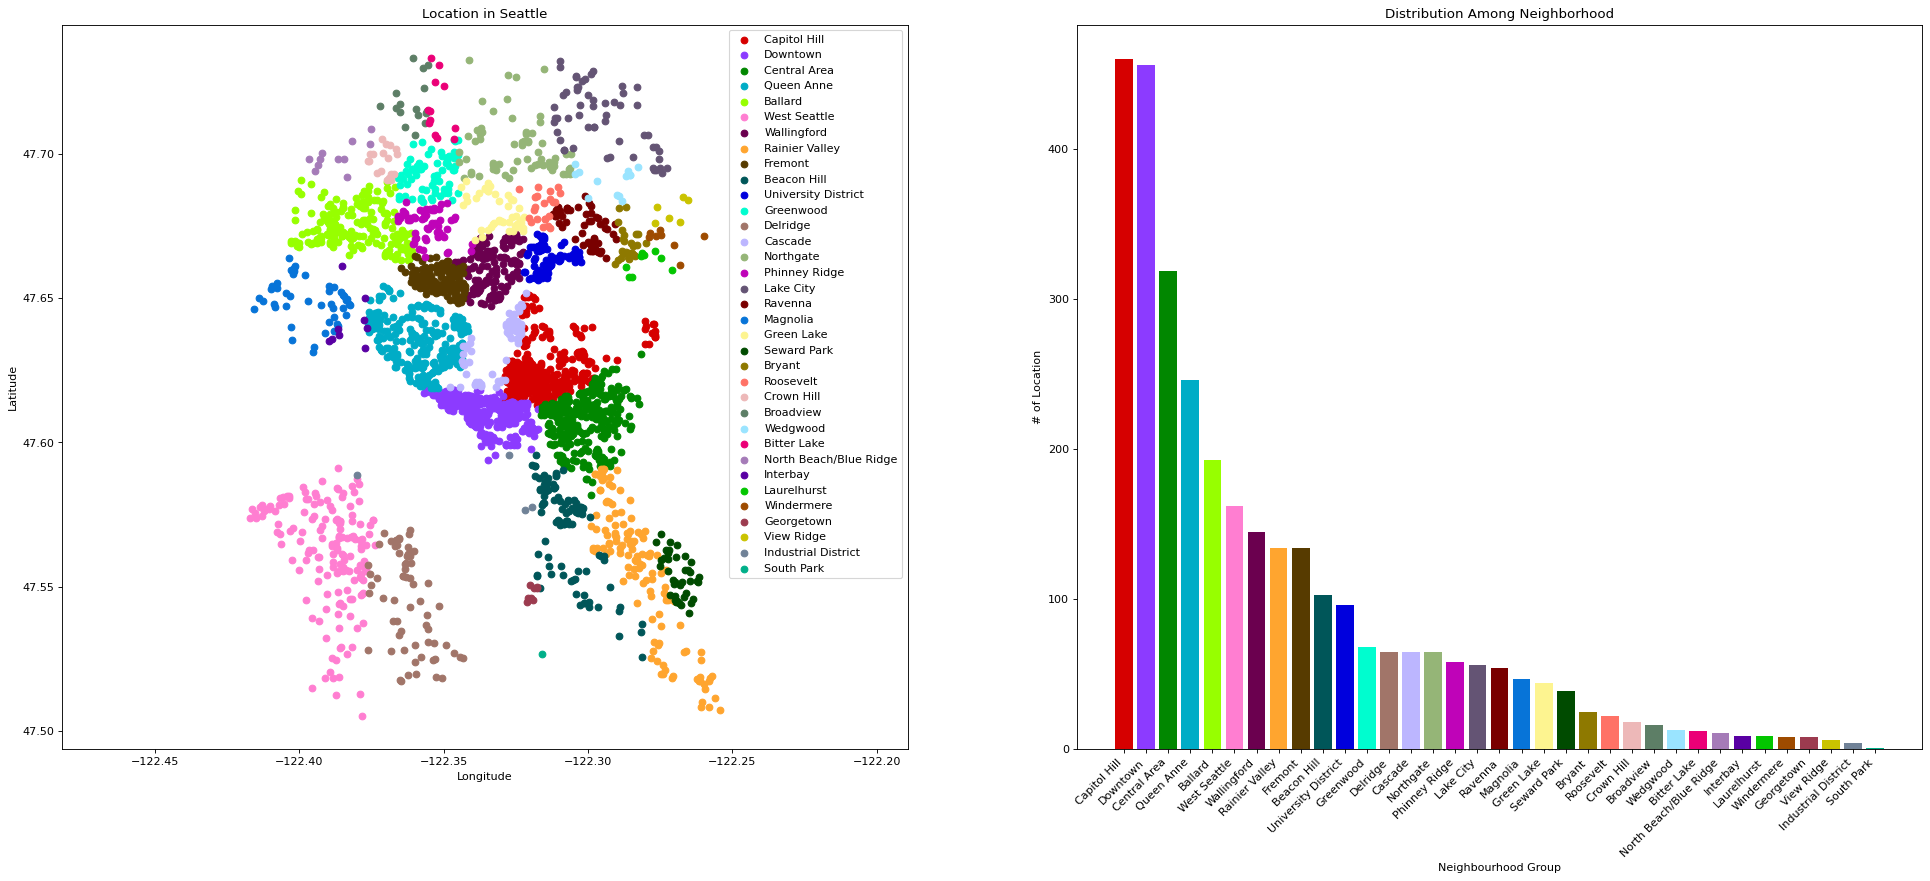

In [120]:
top_4 = plot_graphs_location_distribution(listing)

We can see from the two graphs that the areas with the higher apartment/houses in AirBnB are situate in the center of Seattle and they are:


In [121]:
top_4

,neighbourhood_group_cleansed,count
0,Capitol Hill,460
1,Downtown,456
2,Central Area,319
3,Queen Anne,246


In [122]:
new_listing = listing[listing["neighbourhood_group_cleansed"].isin(["Capitol Hill", "Central Area", "Downtown", "Queen Anne"])]

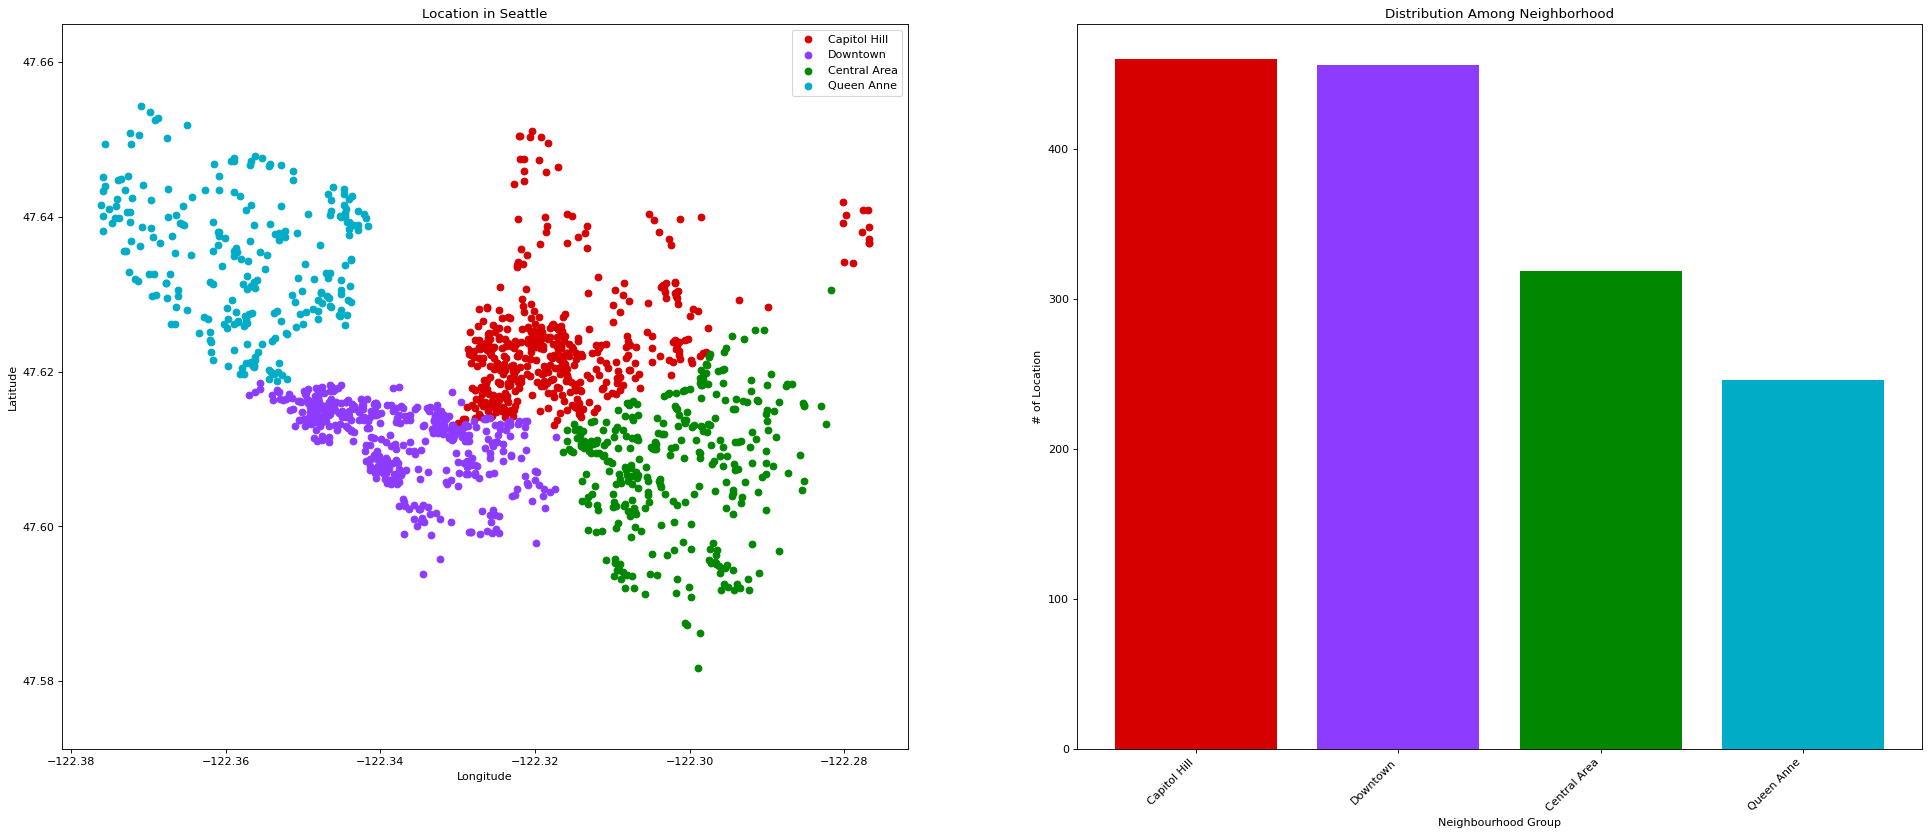

In [123]:
top_4 = plot_graphs_location_distribution(new_listing)

In [124]:
print(total_apt)

3171


Extract the information from the amenities list to check if some of them are important factors to determine the price

In [111]:
import re
amenities=pd.DataFrame()
amenities=listing[['id','amenities']]
amenities=amenities.set_index('id')
amenities['amenities'] = amenities['amenities'].apply(lambda x: re.sub('[{}]', '', x))
amenities.head()

,amenities
id,
241032,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai..."
953595,"TV,Internet,""Wireless Internet"",Kitchen,""Free ..."
3308979,"TV,""Cable TV"",Internet,""Wireless Internet"",""Ai..."
278830,"TV,""Cable TV"",Internet,""Wireless Internet"",Kit..."
5956968,"""Wireless Internet"",""Free Parking on Premises""..."


In [112]:
dumm_variables_df = amenities['amenities'].str.get_dummies(sep=',')
dumm_variables_df

,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""",...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
id,,,,,,,,,,,,,,,,,,,,,
241032,0,1,0,1,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,1
953595,0,0,1,0,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,1,1
3308979,0,1,0,1,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,1,1
278830,0,0,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,1,1,0
5956968,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262764,1,0,0,1,1,0,1,1,1,0,...,0,1,1,1,1,1,0,1,1,1
8578490,0,1,0,1,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,1,1
3383329,1,0,0,0,1,0,1,1,0,1,...,0,1,1,1,1,1,0,1,0,1


In [113]:
joint_amenities=pd.concat([amenities,dumm_variables_df], axis=1, join='inner')
joint_amenities=joint_amenities.drop(['amenities'], axis=1)
joint_amenities.head()

,"""24-Hour Check-in""","""Air Conditioning""","""Buzzer/Wireless Intercom""","""Cable TV""","""Carbon Monoxide Detector""","""Elevator in Building""","""Family/Kid Friendly""","""Fire Extinguisher""","""First Aid Kit""","""Free Parking on Premises""",...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
id,,,,,,,,,,,,,,,,,,,,,
241032,0,1,0,1,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,1
953595,0,0,1,0,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,1,1
3308979,0,1,0,1,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,1,1
278830,0,0,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,1,1,0
5956968,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [14]:
calendar['price_cleaned'] = calendar['price'].replace({'\$':''}, regex = True)

calendar['price_cleaned'] = calendar['price_cleaned'].apply(lambda x: float(str(x).replace(',','')))
calendar.head()

,listing_id,date,available,price,month,price_cleaned
0,241032,2016-01-04,t,$85.00,1,85.0
1,241032,2016-01-05,t,$85.00,1,85.0
2,241032,2016-01-06,f,NaN,1,NaN
3,241032,2016-01-07,f,NaN,1,NaN
4,241032,2016-01-08,f,NaN,1,NaN


In [15]:
df = calendar[['listing_id','month','price_cleaned']].groupby(['listing_id','month']).apply(pd.DataFrame)
df.head()

,listing_id,month,price_cleaned
0,241032,1,85.0
1,241032,1,85.0
2,241032,1,NaN
3,241032,1,NaN
4,241032,1,NaN


In [16]:
df_av_prices = df[['listing_id','price_cleaned']].groupby('listing_id').mean()
df_av_prices = df_av_prices.rename(columns={"price_cleaned": "mean_price"})
df_av_prices.head()

,mean_price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000


In [17]:
df_std_prices = df[['listing_id','price_cleaned']].groupby('listing_id').std()
df_std_prices = df_std_prices.rename(columns={"price_cleaned": "std_price"})
df_std_prices.head()

,std_price
listing_id,
3335,0.000000
4291,0.000000
5682,5.025282
6606,4.520014
7369,0.000000


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

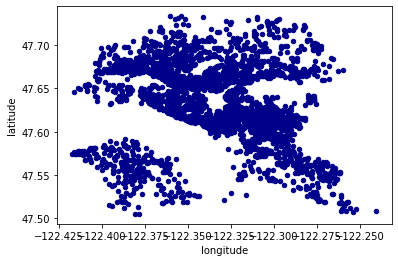

In [18]:
ax1 = listing.plot.scatter(x='longitude', y='latitude', c='DarkBlue')
ax1

In [19]:
location_with_price_df=pd.concat([listing.set_index('id'),df_av_prices], axis=1, join='inner').reset_index()
location_with_price_df=pd.concat([location_with_price_df.set_index('index'),df_std_prices], axis=1, join='inner').reset_index()
location_with_price_df.head()

,index,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_price,std_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000,0.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271,37.225252
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,1301.818182,356.322687
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000,0.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726,23.703194


In [88]:
location_with_price_df['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [21]:
#location_with_price_df[location_with_price_df['zipcode']== '99\n98122']


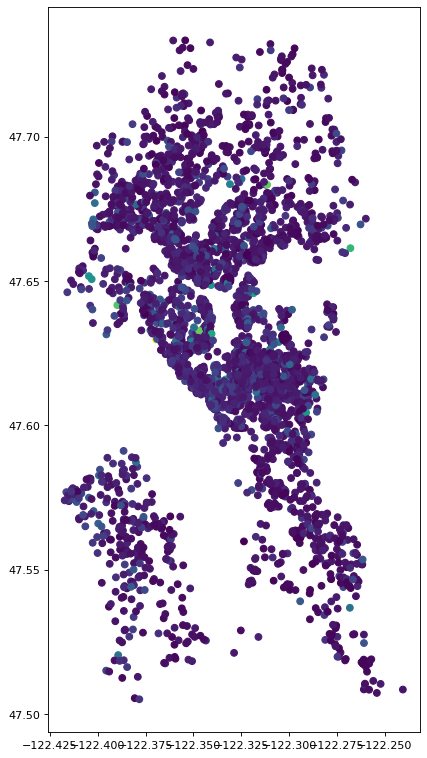

In [22]:


figure(figsize=(6, 12), dpi=80)
plt.pyplot.scatter(x=location_with_price_df['longitude'],y=location_with_price_df['latitude'] , c=location_with_price_df['mean_price'])

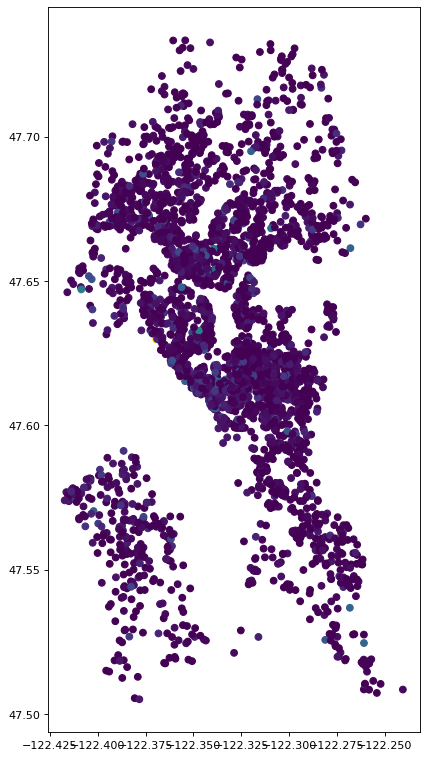

In [23]:
figure(figsize=(6, 12), dpi=80)
plt.pyplot.scatter(x=location_with_price_df['longitude'],y=location_with_price_df['latitude'] , c=location_with_price_df['std_price'])

(47.5, 47.75)

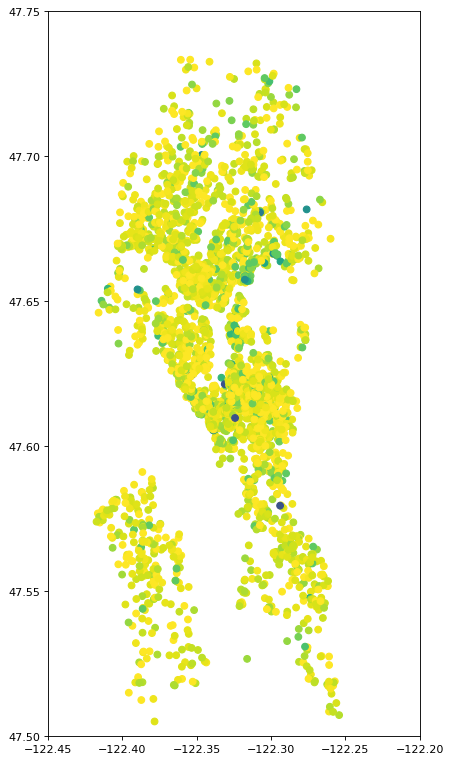

In [24]:
figure(figsize=(6, 12), dpi=80)
plt.pyplot.scatter(x=location_with_price_df['longitude'],y=location_with_price_df['latitude'] , c=location_with_price_df['review_scores_rating'])
plt.pyplot.xlim(-122.45,-122.2)
plt.pyplot.ylim(47.5,47.75)

In [25]:
location_with_price_df['review_scores_rating'].describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [26]:
#location_with_price_df['zipcode']=pd.to_numeric(location_with_price_df['zipcode'])
#location_with_price_df.head()

,index,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_price,std_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000,0.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271,37.225252
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,1301.818182,356.322687
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000,0.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726,23.703194


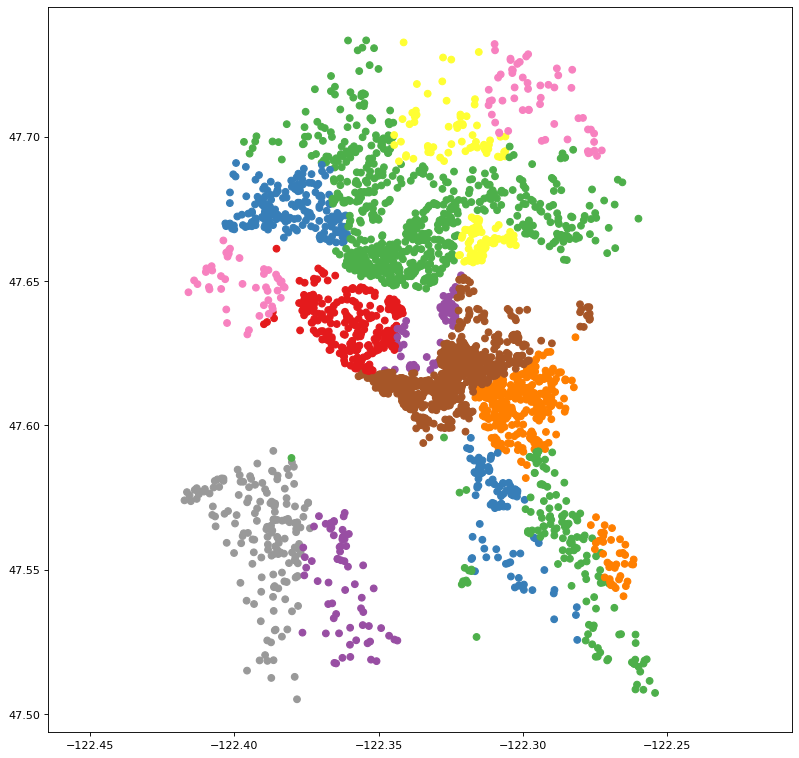

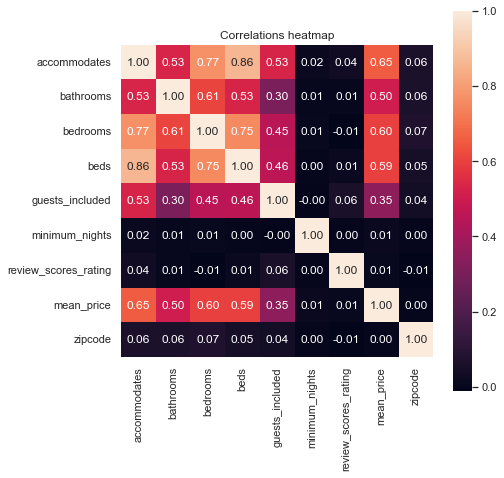

In [31]:
import numpy as np

cols = ['accommodates','bathrooms','bedrooms','beds',
        'guests_included', 'minimum_nights',
        'review_scores_rating', 'mean_price', 'zipcode']

for c in cols:
    location_with_price_df[c].fillna(0, inplace=True)
    location_with_price_df[c]=location_with_price_df[c].apply(pd.to_numeric, errors='raise')

#Find out correlation between columns and plot
corrs = np.corrcoef(location_with_price_df[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

In [32]:
amenities_list=list(joint_amenities.columns)

location_with_price_df.head()

,index,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_price,std_price
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000,0.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271,37.225252
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,1301.818182,356.322687
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000,0.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726,23.703194


In [33]:
location_with_price_df=pd.merge(location_with_price_df, joint_amenities, how='inner', left_on = 'index',right_index=True)
location_with_price_df.head()

,index,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,0,0,1,1,0,1,0,0,1,1
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,0,0,1,1,0,1,0,0,1,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,0,0,1,1,0,1,0,1,1,1
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,0,0,1,1,0,1,0,1,0,1
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,0,0,1,1,0,1,0,1,1,0


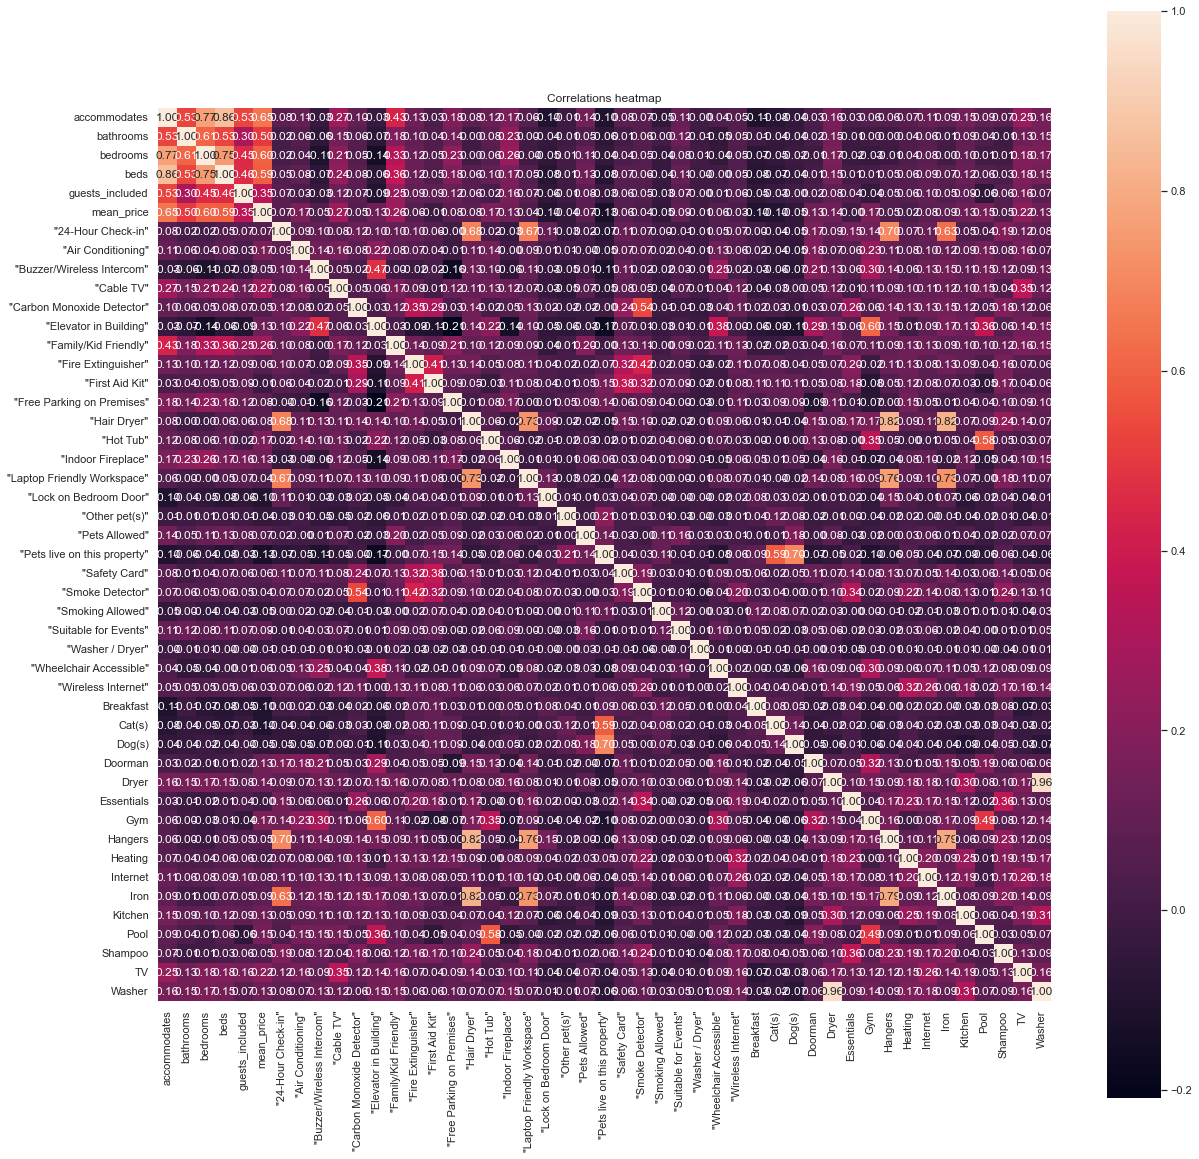

In [34]:
import numpy as np

cols = ['accommodates','bathrooms','bedrooms','beds',
        'guests_included', 'mean_price']

for c in cols:
    location_with_price_df[c].fillna(0, inplace=True)
    location_with_price_df[c]=location_with_price_df[c].apply(pd.to_numeric, errors='raise')

#Find out correlation between columns and plot
corrs = np.corrcoef(location_with_price_df[cols+amenities_list].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(20,20)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols+amenities_list, xticklabels = cols+amenities_list).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

In [91]:
id_to_ziP_df=location_with_price_df[['index','neighbourhood_group_cleansed']]
id_to_ziP_df= id_to_ziP_df.drop_duplicates()
id_to_ziP_df.head()

,index,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [92]:
df.head()

,listing_id,month,price_cleaned
0,241032,1,85.0
1,241032,1,85.0
2,241032,1,NaN
3,241032,1,NaN
4,241032,1,NaN


In [93]:
new_df= pd.merge(df, id_to_ziP_df, how='inner', left_on = 'listing_id', right_on = 'index')
new_df.head()

,listing_id,month,price_cleaned,index,neighbourhood_group_cleansed
0,241032,1,85.0,241032,Queen Anne
1,241032,1,85.0,241032,Queen Anne
2,241032,1,NaN,241032,Queen Anne
3,241032,1,NaN,241032,Queen Anne
4,241032,1,NaN,241032,Queen Anne


In [94]:
new_df = new_df.groupby(['neighbourhood_group_cleansed','month']).mean().reset_index()
new_df= new_df[['neighbourhood_group_cleansed','month','price_cleaned']]
new_df

,neighbourhood_group_cleansed,month,price_cleaned
0,Ballard,1,108.826645
1,Ballard,2,109.653969
2,Ballard,3,112.924742
3,Ballard,4,120.470460
4,Ballard,5,121.540622
...,...,...,...
199,West Seattle,8,159.073464
200,West Seattle,9,154.262692
201,West Seattle,10,147.409162
202,West Seattle,11,146.429412


In [109]:
monthly_df = new_df.groupby(['month']).sum().reset_index()
monthly_df= monthly_df[['month','availability']]
monthly_df

,month,price_cleaned
0,1,117.618603
1,2,117.912008
2,3,121.477283
3,4,127.611014
4,5,131.121210
5,6,136.847273
6,7,141.281998
7,8,139.966809
8,9,134.387001
9,10,129.226407


In [111]:
plt.pyplot.plot(monthly_df['month'], monthly_df['availability'])
plt.pyplot.show()

KeyError: 'availability'

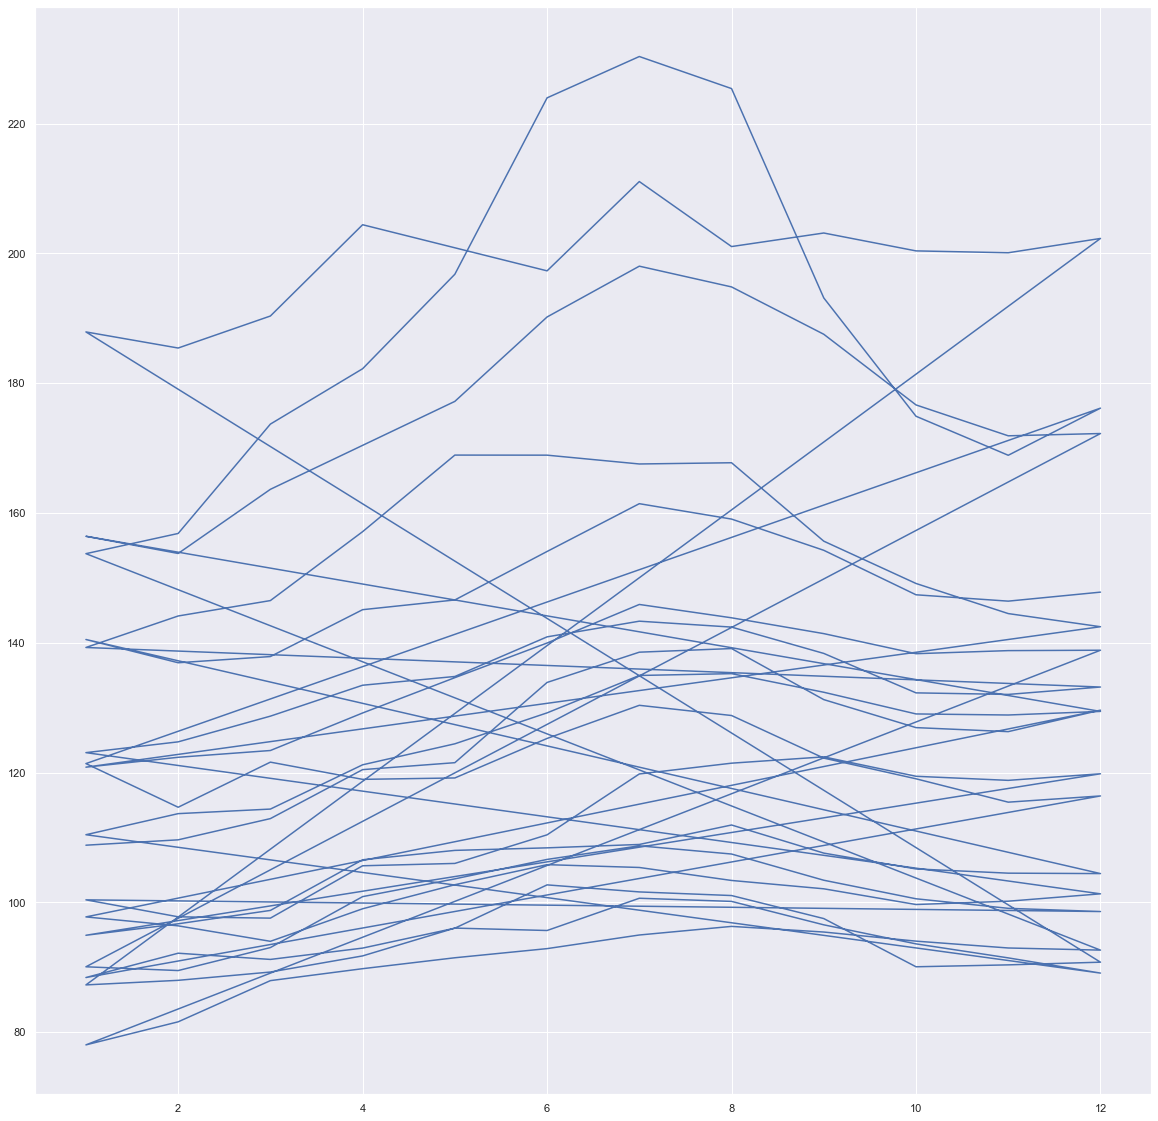

In [95]:
plt.pyplot.plot(new_df['month'], new_df['price_cleaned'], label=new_df['neighbourhood_group_cleansed'])
plt.pyplot.show()

In [96]:
new_df.groupby('neighbourhood_group_cleansed')

In [98]:
new_df_availability= pd.merge(calendar, id_to_ziP_df, how='inner', left_on = 'listing_id', right_on = 'index')
new_df_availability=new_df_availability.groupby(['neighbourhood_group_cleansed','month']).sum().reset_index()
new_df_availability= new_df_availability[['neighbourhood_group_cleansed','month','available']]
new_df_availability

,neighbourhood_group_cleansed,month,available
0,Ballard,1,3663
1,Ballard,2,4069
2,Ballard,3,4850
3,Ballard,4,4587
4,Ballard,5,4985
...,...,...,...
199,West Seattle,8,4247
200,West Seattle,9,4294
201,West Seattle,10,4497
202,West Seattle,11,4420


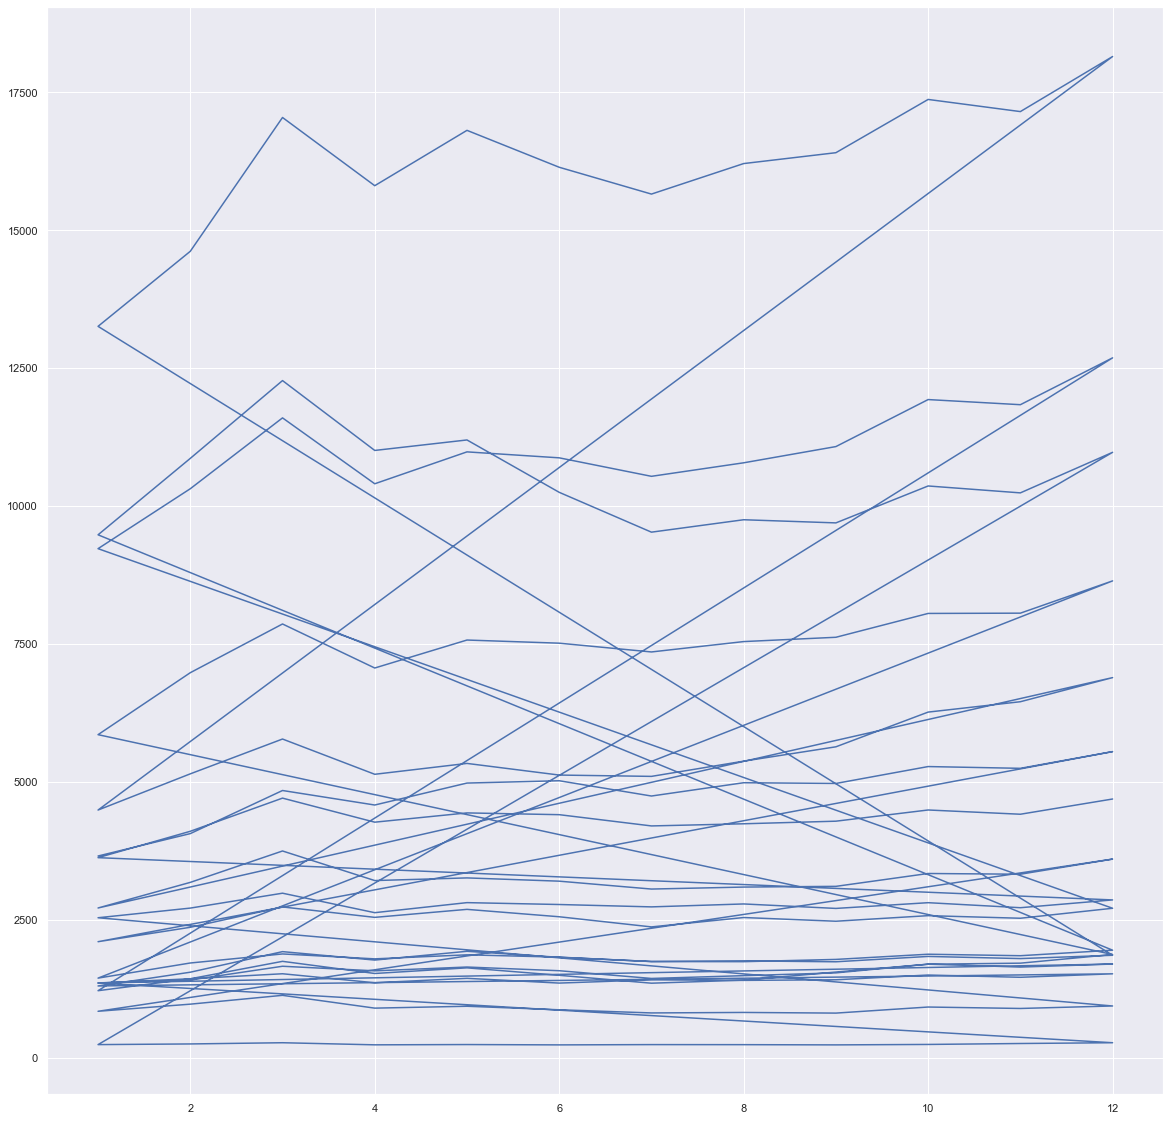

In [99]:
plt.pyplot.plot(new_df_availability['month'], new_df_availability['available'], label=new_df_availability['neighbourhood_group_cleansed'])
plt.pyplot.show()

In [100]:
dx=pd.merge(new_df_availability, new_df, how='inner', left_on = ['month','neighbourhood_group_cleansed'], right_on = ['month','neighbourhood_group_cleansed'])
dx.head()

,neighbourhood_group_cleansed,month,available,price_cleaned
0,Ballard,1,3663,108.826645
1,Ballard,2,4069,109.653969
2,Ballard,3,4850,112.924742
3,Ballard,4,4587,120.470460
4,Ballard,5,4985,121.540622


In [74]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zipcode        324 non-null    float64
 1   month          324 non-null    int64  
 2   available      324 non-null    int32  
 3   price_cleaned  324 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.4 KB


In [101]:
dx = dx.loc[dx['neighbourhood_group_cleansed'] == "Ballard"]
dx.head()

,neighbourhood_group_cleansed,month,available,price_cleaned
0,Ballard,1,3663,108.826645
1,Ballard,2,4069,109.653969
2,Ballard,3,4850,112.924742
3,Ballard,4,4587,120.470460
4,Ballard,5,4985,121.540622


Text(0, 0.5, 'Average Price')

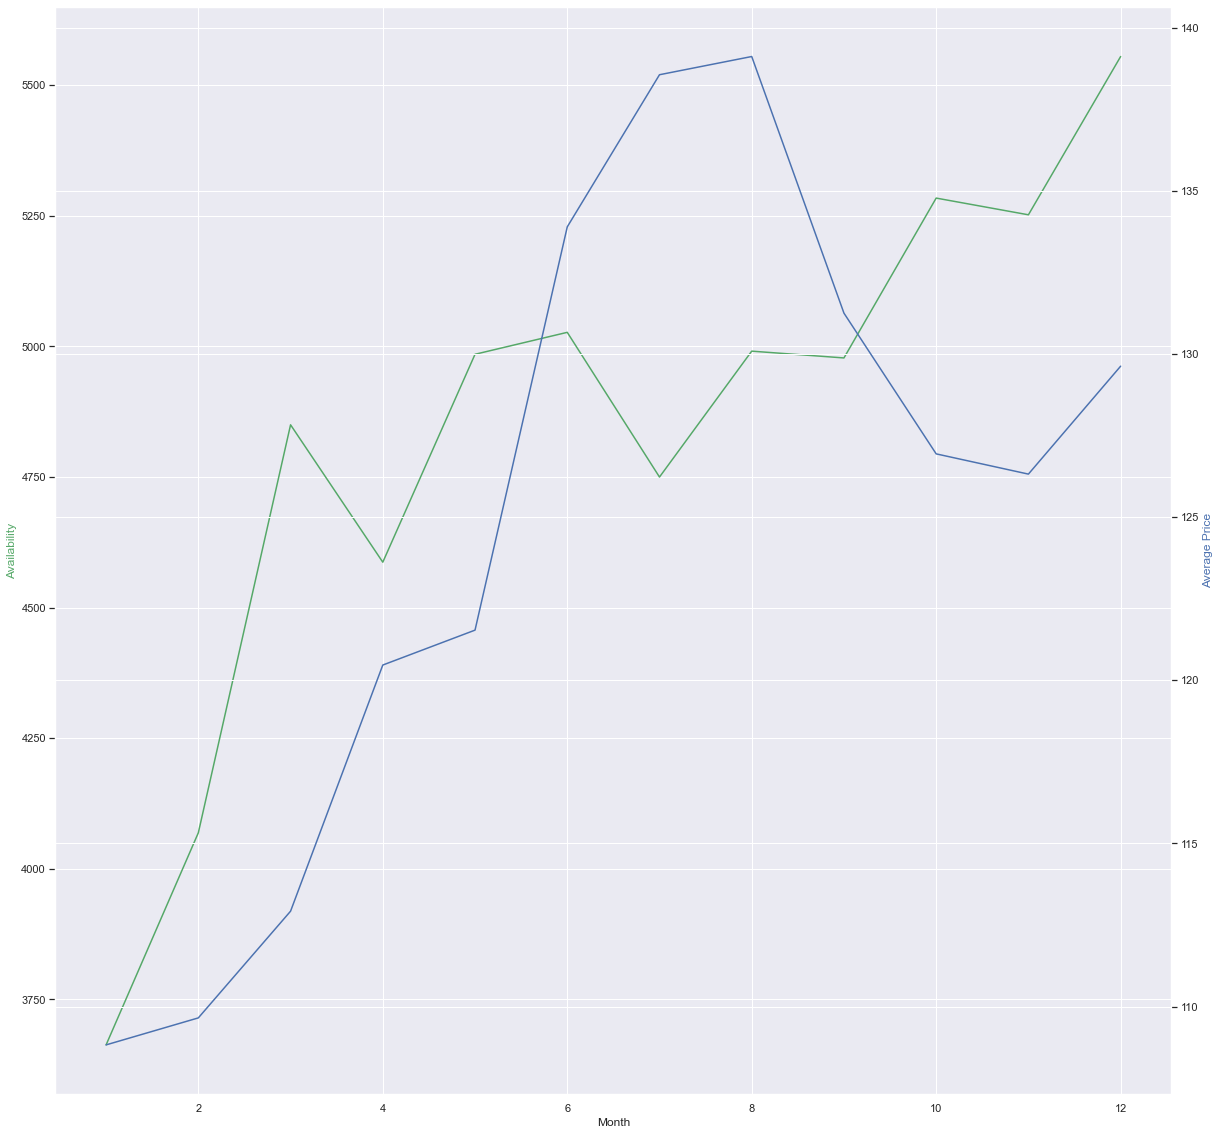

In [108]:

fig, ax1 = plt.pyplot.subplots()
ax2 = ax1.twinx()
ax1.plot(dx['month'], dx['available'], 'g-')
ax2.plot(dx['month'], dx['price_cleaned'], 'b-')

ax1.set_xlabel('Month')
ax1.set_ylabel('Availability', color='g')
ax2.set_ylabel('Average Price', color='b')

